In [2]:
import os
from pathlib import Path
import librosa   #for audio processing
import itertools
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import os,sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from clean import Clean
from eda import EDA

In [3]:
cleaning_audios = Clean()

2022-05-31 13:09:26,416:logger:Successfully initialized clean class


In [4]:
swahilis = cleaning_audios.load_audios('swahili','train',start=0,stop=5)
amharics = cleaning_audios.load_audios('amharics','train',start=0,stop=5)

2022-05-31 13:09:28,221:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part12.wav
2022-05-31 13:09:28,413:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part131.wav
2022-05-31 13:09:28,564:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part474.wav
2022-05-31 13:09:28,848:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part10.wav
2022-05-31 13:09:29,101:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part13.wav
2022-05-31 13:09:29,102:logger:The audio files duration is successfully computed
2022-05-31 13:09:29,104:logger:The audio files duration is successfully computed
2


This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [5]:
swahilis

[(array([ 0.03245375,  0.03846586,  0.0385337 , ..., -0.07476594,
         -0.05082636, -0.02326697], dtype=float32),
  44100,
  3.26),
 (array([-0.02488699, -0.03716682, -0.04580902, ...,  0.1096026 ,
          0.07886446,  0.03810541], dtype=float32),
  44100,
  3.46),
 (array([-0.00017227, -0.00018666, -0.00015308, ...,  0.07018407,
          0.03893354,  0.        ], dtype=float32),
  44100,
  2.559954648526077),
 (array([0.0269126 , 0.03767747, 0.04547471, ..., 0.10734788, 0.07342707,
         0.03271665], dtype=float32),
  44100,
  5.24),
 (array([-0.04321316, -0.04465769, -0.03415572, ..., -0.08990397,
         -0.06162187, -0.02845496], dtype=float32),
  44100,
  4.53)]

Playing Audio:

Using,IPython.display.Audio you can play the audio in your jupyter notebook.

In [6]:
audio,rate,duration = amharics[0]
ipd.Audio(audio, rate=rate)

In [7]:
audio,rate,duration = swahilis[0]
ipd.Audio(audio, rate=rate)

In [8]:
duration

3.26

Visualizing Audio:

We can plot the audio array using librosa.display.waveplot:

2022-05-31 13:09:53,369:logger:Successfully initialized eda class


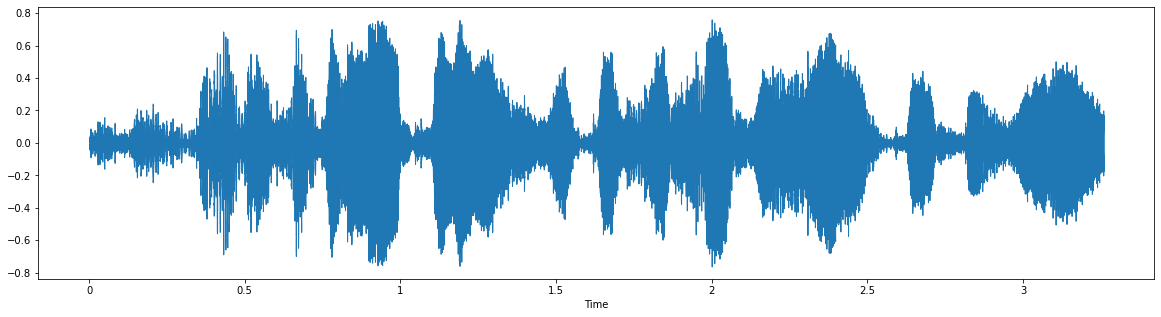

In [9]:
%matplotlib inline
eda = EDA()
eda.sound_plots(audio,rate,'waveshow')


### Spectrogram
 
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

We can display a spectrogram using. librosa.display.specshow.

In [11]:
spe_samples,frequency=eda.spectrogram(audio)

In [12]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [13]:
spe_samples

array([[4.31695434e-02, 4.08169710e-02, 3.81760219e-02, ...,
        4.17994225e-02, 4.31206073e-02, 3.96572068e-02],
       [2.24808643e-02, 2.06947720e-02, 1.93818938e-02, ...,
        2.14931947e-02, 2.17515783e-02, 2.00838187e-02],
       [1.40665656e-05, 1.67380746e-06, 1.07943292e-06, ...,
        1.29447838e-05, 5.00207047e-08, 6.97334504e-07],
       ...,
       [1.23967825e-16, 6.45380389e-19, 1.05773284e-16, ...,
        1.26563781e-16, 5.19680846e-17, 6.34339772e-17],
       [1.19392280e-16, 5.49422309e-17, 6.58818166e-17, ...,
        2.87769205e-17, 4.77951488e-18, 1.12539111e-16],
       [8.24536244e-17, 3.48728147e-17, 1.83962175e-17, ...,
        3.98990139e-17, 3.11661444e-18, 3.81415078e-17]])

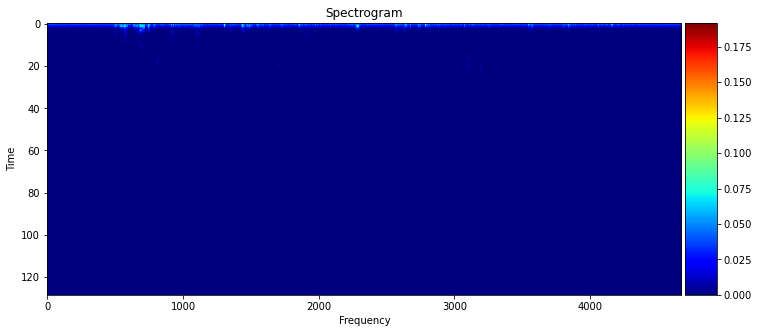

In [14]:
eda.plot_spectrogram_feature(spe_samples)

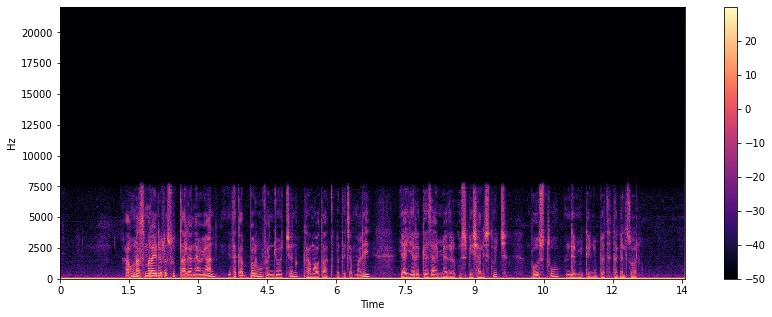

In [15]:
eda.sound_plots(audio,rate,'specshow')

The vertical axis shows frequencies (from 0 to 8kHz), and the horizontal axis shows the time of the clip. 

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
.specshow is used to display a spectrogram.
The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 


# Data Augumentation

###Time Shifting
Here we shift the wave by sample_rate/10 factor. This will move the wave to the right by given factor along time axis.
For achieving this I have used numpy’s roll function to generate time shifting.


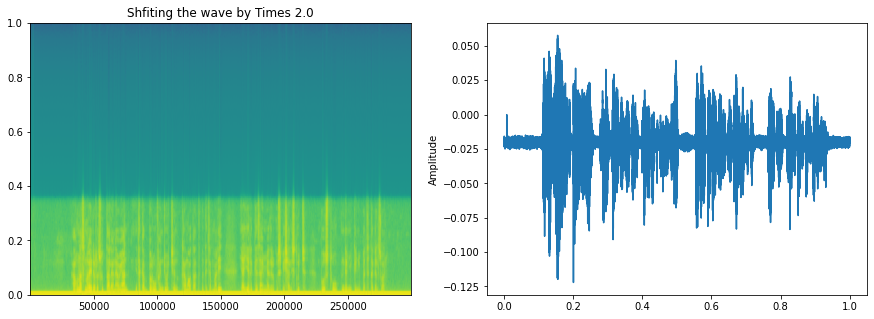

In [16]:
wav_roll = np.roll(audio,int(rate/9))
eda.plot_spec(data=wav_roll,sr=20)
ipd.Audio(wav_roll,rate=rate)

Other Data Augumentation Methods are
1. Pitch Shifting
2. Time Streching 

###Feature extraction from Audio signal
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. 


**Mel-Frequency Cepstral Coefficients(MFCCs)**

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.



In [10]:
mfcc_features = eda.features(audio,rate,'mfcc')

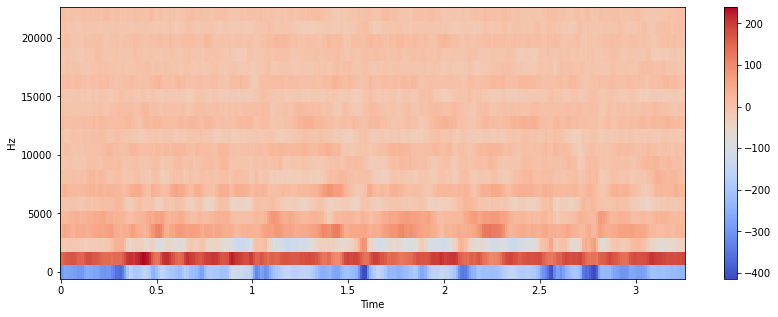

In [11]:
eda.sound_plots(audio,rate,'specshow',features=mfcc_features)

Transcription preprocessing 

In [10]:
swahili_train_labels = cleaning_audios.get_labels('swahili','train')
swahili_test_labels = cleaning_audios.get_labels('swahili','test')
amharic_train_labels = cleaning_audios.get_labels('amharic','train')
amharic_test_labels = cleaning_audios.get_labels('amharic','test')

In [11]:
swahili_text_data, swahili_label_data = cleaning_audios.read_data('../data/swahili_train_text.txt', '../data/swahili_test_text.txt',
                                                  swahili_train_labels, swahili_test_labels)
amharic_text_data, amharic_label_data = cleaning_audios.read_data('../data/amharic_train_text.txt', '../data/amharic_test_text.txt',
                                                  amharic_train_labels, amharic_test_labels)

2022-05-31 13:10:09,694:logger:successfully read file
2022-05-31 13:10:09,696:logger:successfully read file
2022-05-31 13:10:10,778:logger:Successfully read the data
2022-05-31 13:10:10,797:logger:successfully read file
2022-05-31 13:10:10,800:logger:successfully read file
2022-05-31 13:10:11,884:logger:Successfully read the data


In [12]:
swahili_data = pd.DataFrame({'key': swahili_label_data, 'text': swahili_text_data})
amharic_data = pd.DataFrame({'key': amharic_label_data, 'text': amharic_text_data})

In [ ]:
swahili_recordings = cleaning_audios.load_audios('swahili',files=swahili_data.key.to_list())
amharic_recordings = cleaning_audios.load_audios('amharic',files=amharic_data.key.to_list())

2022-05-31 13:10:15,303:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part12.wav
2022-05-31 13:10:15,501:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part131.wav
2022-05-31 13:10:15,658:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part474.wav
2022-05-31 13:10:15,946:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part10.wav
2022-05-31 13:10:16,246:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part13.wav
2022-05-31 13:10:16,420:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part273

2022-05-31 13:10:26,343:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part37.wav
2022-05-31 13:10:26,553:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part412.wav
2022-05-31 13:10:26,719:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part473.wav
2022-05-31 13:10:26,898:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part31.wav
2022-05-31 13:10:27,038:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part206.wav
2022-05-31 13:10:27,248:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part19

2022-05-31 13:10:37,088:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part367.wav
2022-05-31 13:10:37,344:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part471.wav
2022-05-31 13:10:37,545:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part306.wav
2022-05-31 13:10:37,849:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part382.wav
2022-05-31 13:10:38,204:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part84.wav
2022-05-31 13:10:38,344:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part2

2022-05-31 13:10:47,262:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part126.wav
2022-05-31 13:10:47,432:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part70.wav
2022-05-31 13:10:47,587:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part100.wav
2022-05-31 13:10:47,915:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part258.wav
2022-05-31 13:10:48,222:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part281.wav
2022-05-31 13:10:48,447:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part2

2022-05-31 13:10:57,854:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part222.wav
2022-05-31 13:10:58,100:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part466.wav
2022-05-31 13:10:58,276:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part247.wav
2022-05-31 13:10:58,499:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part380.wav
2022-05-31 13:10:58,724:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part423.wav
2022-05-31 13:10:58,876:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part

2022-05-31 13:11:07,925:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part387.wav
2022-05-31 13:11:08,076:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part475.wav
2022-05-31 13:11:08,214:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part236.wav
2022-05-31 13:11:08,446:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part57.wav
2022-05-31 13:11:08,580:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part92.wav
2022-05-31 13:11:08,716:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part32

2022-05-31 13:11:18,196:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part109.wav
2022-05-31 13:11:18,330:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part186.wav
2022-05-31 13:11:18,496:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part117.wav
2022-05-31 13:11:18,766:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part160.wav
2022-05-31 13:11:18,998:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part56.wav
2022-05-31 13:11:19,230:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part6

2022-05-31 13:11:27,746:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part366.wav
2022-05-31 13:11:28,026:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part365.wav
2022-05-31 13:11:28,187:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part164.wav
2022-05-31 13:11:28,380:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part243.wav
2022-05-31 13:11:28,548:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part48.wav
2022-05-31 13:11:28,764:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part4

2022-05-31 13:11:38,000:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part180.wav
2022-05-31 13:11:38,168:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part188.wav
2022-05-31 13:11:38,439:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part41.wav
2022-05-31 13:11:38,692:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part340.wav
2022-05-31 13:11:38,843:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part200.wav
2022-05-31 13:11:38,978:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part1

2022-05-31 13:11:47,905:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part44.wav
2022-05-31 13:11:48,090:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part35.wav
2022-05-31 13:11:48,280:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part99.wav
2022-05-31 13:11:48,435:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part271.wav
2022-05-31 13:11:48,643:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part299.wav
2022-05-31 13:11:48,785:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part430

2022-05-31 13:11:57,832:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part220.wav
2022-05-31 13:11:58,088:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part232.wav
2022-05-31 13:11:58,386:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part338.wav
2022-05-31 13:11:58,522:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part162.wav
2022-05-31 13:11:58,679:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part157.wav
2022-05-31 13:11:58,891:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part

2022-05-31 13:12:07,590:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part336.wav
2022-05-31 13:12:07,806:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part91.wav
2022-05-31 13:12:07,981:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part82.wav
2022-05-31 13:12:08,287:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part261.wav
2022-05-31 13:12:08,530:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part271.wav
2022-05-31 13:12:08,785:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part42

2022-05-31 13:12:17,927:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part127.wav
2022-05-31 13:12:18,073:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part191.wav
2022-05-31 13:12:18,289:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part233.wav
2022-05-31 13:12:18,460:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part362.wav
2022-05-31 13:12:18,641:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part25.wav
2022-05-31 13:12:18,777:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part3

2022-05-31 13:12:27,517:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part103.wav
2022-05-31 13:12:27,814:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part163.wav
2022-05-31 13:12:27,943:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part325.wav
2022-05-31 13:12:28,066:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part396.wav
2022-05-31 13:12:28,238:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part430.wav
2022-05-31 13:12:28,412:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part

2022-05-31 13:12:36,976:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part301.wav
2022-05-31 13:12:37,183:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part50.wav
2022-05-31 13:12:37,402:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part349.wav
2022-05-31 13:12:37,555:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part34.wav
2022-05-31 13:12:37,836:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part305.wav
2022-05-31 13:12:38,035:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part18

2022-05-31 13:12:47,048:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part26.wav
2022-05-31 13:12:47,338:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part190.wav
2022-05-31 13:12:47,505:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part273.wav
2022-05-31 13:12:47,724:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part3.wav
2022-05-31 13:12:48,035:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part118.wav
2022-05-31 13:12:48,303:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part309

2022-05-31 13:12:58,004:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part2.wav
2022-05-31 13:12:58,161:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part230.wav
2022-05-31 13:12:58,328:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part252.wav
2022-05-31 13:12:58,476:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part134.wav
2022-05-31 13:12:58,710:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part251.wav
2022-05-31 13:12:58,922:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part12

2022-05-31 13:13:07,633:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part331.wav
2022-05-31 13:13:07,758:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part359.wav
2022-05-31 13:13:08,094:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part15.wav
2022-05-31 13:13:08,249:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part297.wav
2022-05-31 13:13:08,412:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part41.wav
2022-05-31 13:13:08,695:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part38

2022-05-31 13:13:17,718:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part303.wav
2022-05-31 13:13:17,904:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part388.wav
2022-05-31 13:13:18,150:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part312.wav
2022-05-31 13:13:18,459:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part244.wav
2022-05-31 13:13:18,598:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part45.wav
2022-05-31 13:13:18,777:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101227/SWH-15-20101227_16k-emission_swahili_15h00_-_16h00_tu_20101227_part5

2022-05-31 13:13:27,649:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part134.wav
2022-05-31 13:13:27,828:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part114.wav
2022-05-31 13:13:28,066:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part143.wav
2022-05-31 13:13:28,263:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part131.wav
2022-05-31 13:13:28,420:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part177.wav
2022-05-31 13:13:28,583:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part

2022-05-31 13:13:37,678:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part81.wav
2022-05-31 13:13:37,822:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part48.wav
2022-05-31 13:13:38,053:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part185.wav
2022-05-31 13:13:38,318:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part190.wav
2022-05-31 13:13:38,445:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part36.wav
2022-05-31 13:13:38,721:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part145

2022-05-31 13:13:48,071:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part197.wav
2022-05-31 13:13:48,355:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part5.wav
2022-05-31 13:13:48,552:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part1.wav
2022-05-31 13:13:48,716:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part68.wav
2022-05-31 13:13:48,916:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part208.wav
2022-05-31 13:13:49,099:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part56.wa

2022-05-31 13:13:57,058:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part91.wav
2022-05-31 13:13:57,267:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part94.wav
2022-05-31 13:13:57,545:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part124.wav
2022-05-31 13:13:57,685:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part206.wav
2022-05-31 13:13:57,861:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part26.wav
2022-05-31 13:13:58,051:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part9.w

2022-05-31 13:14:06,361:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part14.wav
2022-05-31 13:14:06,614:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part18.wav
2022-05-31 13:14:06,796:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part44.wav
2022-05-31 13:14:07,004:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part160.wav
2022-05-31 13:14:07,283:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part12.wav
2022-05-31 13:14:07,571:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101107/SWH-05-20101107_16k-emission_swahili_05h30_-_06h00_tu_20101107_part151.

2022-05-31 13:14:16,227:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part211.wav
2022-05-31 13:14:16,414:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part70.wav
2022-05-31 13:14:16,557:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part147.wav
2022-05-31 13:14:16,730:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part175.wav
2022-05-31 13:14:16,921:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part60.wav
2022-05-31 13:14:17,219:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part19

2022-05-31 13:14:26,246:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part135.wav
2022-05-31 13:14:26,374:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part200.wav
2022-05-31 13:14:26,595:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part26.wav
2022-05-31 13:14:26,799:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part90.wav
2022-05-31 13:14:27,010:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part6.wav
2022-05-31 13:14:27,188:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part149.

2022-05-31 13:14:35,835:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part15.wav
2022-05-31 13:14:36,052:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part127.wav
2022-05-31 13:14:36,278:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part121.wav
2022-05-31 13:14:36,407:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part184.wav
2022-05-31 13:14:36,685:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part89.wav
2022-05-31 13:14:36,884:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part10

2022-05-31 13:14:45,527:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part43.wav
2022-05-31 13:14:45,815:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part201.wav
2022-05-31 13:14:46,045:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part209.wav
2022-05-31 13:14:46,237:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part85.wav
2022-05-31 13:14:46,382:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part187.wav
2022-05-31 13:14:46,524:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110125/SWH-05-20110125_16k-emission_swahili_05h30_-_06h00_tu_20110125_part42

2022-05-31 13:14:54,596:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part13.wav
2022-05-31 13:14:54,814:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part254.wav
2022-05-31 13:14:55,007:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part314.wav
2022-05-31 13:14:55,315:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part73.wav
2022-05-31 13:14:55,584:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part329.wav
2022-05-31 13:14:55,760:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part42

2022-05-31 13:15:04,656:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part383.wav
2022-05-31 13:15:04,866:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part125.wav
2022-05-31 13:15:05,139:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part228.wav
2022-05-31 13:15:05,277:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part184.wav
2022-05-31 13:15:05,583:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part255.wav
2022-05-31 13:15:05,746:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part

2022-05-31 13:15:15,327:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part138.wav
2022-05-31 13:15:15,613:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part6.wav
2022-05-31 13:15:15,969:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part20.wav
2022-05-31 13:15:16,132:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part15.wav
2022-05-31 13:15:16,519:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part94.wav
2022-05-31 13:15:16,774:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part186.w

2022-05-31 13:15:27,588:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part257.wav
2022-05-31 13:15:27,774:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part121.wav
2022-05-31 13:15:27,976:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part233.wav
2022-05-31 13:15:28,133:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part306.wav
2022-05-31 13:15:28,346:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part122.wav
2022-05-31 13:15:28,562:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part

2022-05-31 13:15:37,603:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part108.wav
2022-05-31 13:15:37,739:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part302.wav
2022-05-31 13:15:37,913:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part97.wav
2022-05-31 13:15:38,212:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part292.wav
2022-05-31 13:15:38,364:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part273.wav
2022-05-31 13:15:38,672:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part3

2022-05-31 13:15:47,288:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part237.wav
2022-05-31 13:15:47,431:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part232.wav
2022-05-31 13:15:47,632:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part248.wav
2022-05-31 13:15:47,758:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part307.wav
2022-05-31 13:15:47,905:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part67.wav
2022-05-31 13:15:48,100:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part4

2022-05-31 13:15:56,390:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part360.wav
2022-05-31 13:15:56,560:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part413.wav
2022-05-31 13:15:56,725:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part366.wav
2022-05-31 13:15:56,869:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part100.wav
2022-05-31 13:15:57,179:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part116.wav
2022-05-31 13:15:57,352:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part

2022-05-31 13:16:05,542:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part328.wav
2022-05-31 13:16:05,689:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part392.wav
2022-05-31 13:16:05,854:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part370.wav
2022-05-31 13:16:06,008:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part431.wav
2022-05-31 13:16:06,205:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part428.wav
2022-05-31 13:16:06,508:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part

2022-05-31 13:16:15,381:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part409.wav
2022-05-31 13:16:15,505:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part224.wav
2022-05-31 13:16:15,714:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part244.wav
2022-05-31 13:16:15,903:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part325.wav
2022-05-31 13:16:16,098:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part59.wav
2022-05-31 13:16:16,287:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110303/SWH-15-20110303_16k-emission_swahili_15h00_-_16h00_tu_20110303_part4

2022-05-31 13:16:24,912:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part199.wav
2022-05-31 13:16:25,093:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part46.wav
2022-05-31 13:16:25,254:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part156.wav
2022-05-31 13:16:25,544:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part147.wav
2022-05-31 13:16:25,670:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part193.wav
2022-05-31 13:16:25,980:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part1

2022-05-31 13:16:34,152:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part17.wav
2022-05-31 13:16:34,293:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part115.wav
2022-05-31 13:16:34,472:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part159.wav
2022-05-31 13:16:34,694:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part27.wav
2022-05-31 13:16:34,977:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part2.wav
2022-05-31 13:16:35,201:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part111.

2022-05-31 13:16:43,584:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part11.wav
2022-05-31 13:16:43,755:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part105.wav
2022-05-31 13:16:43,881:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part155.wav
2022-05-31 13:16:44,104:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part108.wav
2022-05-31 13:16:44,434:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part172.wav
2022-05-31 13:16:44,588:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part2

2022-05-31 13:16:53,325:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part161.wav
2022-05-31 13:16:53,484:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part122.wav
2022-05-31 13:16:53,644:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part124.wav
2022-05-31 13:16:53,851:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part102.wav
2022-05-31 13:16:54,019:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part136.wav
2022-05-31 13:16:54,272:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110114/SWH-05-20110114_16k-emission_swahili_05h30_-_06h00_tu_20110114_part

2022-05-31 13:17:03,696:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part331.wav
2022-05-31 13:17:03,830:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part335.wav
2022-05-31 13:17:04,059:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part402.wav
2022-05-31 13:17:04,211:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part192.wav
2022-05-31 13:17:04,400:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part337.wav
2022-05-31 13:17:04,544:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part

2022-05-31 13:17:13,086:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part208.wav
2022-05-31 13:17:13,260:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part385.wav
2022-05-31 13:17:13,403:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part397.wav
2022-05-31 13:17:13,597:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part458.wav
2022-05-31 13:17:13,806:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part451.wav
2022-05-31 13:17:13,986:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part

2022-05-31 13:17:23,487:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part288.wav
2022-05-31 13:17:23,820:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part429.wav
2022-05-31 13:17:24,017:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part44.wav
2022-05-31 13:17:24,199:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part381.wav
2022-05-31 13:17:24,378:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part214.wav
2022-05-31 13:17:24,525:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part3

2022-05-31 13:17:34,064:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part367.wav
2022-05-31 13:17:34,237:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part76.wav
2022-05-31 13:17:34,410:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part3.wav
2022-05-31 13:17:34,559:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part249.wav
2022-05-31 13:17:34,706:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part302.wav
2022-05-31 13:17:34,894:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part71.

2022-05-31 13:17:43,121:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part158.wav
2022-05-31 13:17:43,282:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part432.wav
2022-05-31 13:17:43,532:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part349.wav
2022-05-31 13:17:43,702:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part411.wav
2022-05-31 13:17:43,856:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part179.wav
2022-05-31 13:17:44,008:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part

2022-05-31 13:17:53,187:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part286.wav
2022-05-31 13:17:53,369:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part430.wav
2022-05-31 13:17:53,576:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part139.wav
2022-05-31 13:17:53,729:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part176.wav
2022-05-31 13:17:54,020:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part461.wav
2022-05-31 13:17:54,182:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part

2022-05-31 13:18:02,700:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part240.wav
2022-05-31 13:18:02,903:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part49.wav
2022-05-31 13:18:03,106:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part175.wav
2022-05-31 13:18:03,264:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part32.wav
2022-05-31 13:18:03,455:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part63.wav
2022-05-31 13:18:03,746:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part448

2022-05-31 13:18:12,369:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part108.wav
2022-05-31 13:18:12,496:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part386.wav
2022-05-31 13:18:12,643:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part322.wav
2022-05-31 13:18:12,819:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part376.wav
2022-05-31 13:18:13,060:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part474.wav
2022-05-31 13:18:13,193:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part

2022-05-31 13:18:21,453:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part37.wav
2022-05-31 13:18:21,644:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part334.wav
2022-05-31 13:18:21,854:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part374.wav
2022-05-31 13:18:22,176:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part84.wav
2022-05-31 13:18:22,496:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part421.wav
2022-05-31 13:18:22,715:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part45

2022-05-31 13:18:31,546:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part112.wav
2022-05-31 13:18:31,850:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part443.wav
2022-05-31 13:18:32,057:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part69.wav
2022-05-31 13:18:32,206:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part245.wav
2022-05-31 13:18:32,429:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part231.wav
2022-05-31 13:18:32,589:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20110126/SWH-15-20110126_16k-emission_swahili_15h00_-_16h00_tu_20110126_part1

2022-05-31 13:18:42,534:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part23.wav
2022-05-31 13:18:42,701:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part188.wav
2022-05-31 13:18:42,904:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part409.wav
2022-05-31 13:18:43,066:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part295.wav
2022-05-31 13:18:43,396:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part20.wav
2022-05-31 13:18:43,609:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part299.wav
2022-05-31 13:18:4

2022-05-31 13:18:54,543:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part57.wav
2022-05-31 13:18:54,717:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part139.wav
2022-05-31 13:18:54,900:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part394.wav
2022-05-31 13:18:55,158:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part329.wav
2022-05-31 13:18:55,548:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part8.wav
2022-05-31 13:18:55,901:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part324.wav
2022-05-31 13:18:56

2022-05-31 13:19:08,162:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part55.wav
2022-05-31 13:19:08,323:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part129.wav
2022-05-31 13:19:08,583:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part347.wav
2022-05-31 13:19:08,773:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part156.wav
2022-05-31 13:19:08,944:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part381.wav
2022-05-31 13:19:09,217:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part205.wav
2022-05-31 13:19:

2022-05-31 13:19:23,482:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part84.wav
2022-05-31 13:19:23,745:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part17.wav
2022-05-31 13:19:23,978:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part250.wav
2022-05-31 13:19:24,186:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part296.wav
2022-05-31 13:19:24,358:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part364.wav
2022-05-31 13:19:24,564:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part174.wav
2022-05-31 13:19:2

2022-05-31 13:19:35,358:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part6.wav
2022-05-31 13:19:35,751:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part393.wav
2022-05-31 13:19:36,118:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part26.wav
2022-05-31 13:19:36,626:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part338.wav
2022-05-31 13:19:36,904:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part15.wav
2022-05-31 13:19:37,089:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part264.wav
2022-05-31 13:19:37,

2022-05-31 13:19:53,211:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part187.wav
2022-05-31 13:19:53,608:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part342.wav
2022-05-31 13:19:54,129:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part137.wav
2022-05-31 13:19:54,343:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part345.wav
2022-05-31 13:19:56,501:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part375.wav
2022-05-31 13:19:56,860:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part37.wav
2022-05-31 13:19:

2022-05-31 13:20:10,194:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part258.wav
2022-05-31 13:20:10,387:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part21.wav
2022-05-31 13:20:10,871:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part185.wav
2022-05-31 13:20:11,098:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part293.wav
2022-05-31 13:20:11,421:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part228.wav
2022-05-31 13:20:11,696:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part157.wav
2022-05-31 13:20:

2022-05-31 13:20:24,499:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part266.wav
2022-05-31 13:20:24,753:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part189.wav
2022-05-31 13:20:25,004:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part93.wav
2022-05-31 13:20:25,199:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part45.wav
2022-05-31 13:20:25,362:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part181.wav
2022-05-31 13:20:25,560:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part24.wav
2022-05-31 13:20:25

2022-05-31 13:20:38,826:logger:successfully loaded ../data/swahili_train_wav/SWH-15-20101109/SWH-15-20101109_emission_swahili_15h00_-_16h00_tu_20101109_part416.wav
2022-05-31 13:20:39,162:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part95.wav
2022-05-31 13:20:39,434:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part219.wav
2022-05-31 13:20:39,788:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part16.wav
2022-05-31 13:20:40,060:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part207.wav
2022-05-31 13:20:40,297:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part6.wav
2022-05-31 13:20:40,

2022-05-31 13:20:50,035:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part108.wav
2022-05-31 13:20:50,244:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part66.wav
2022-05-31 13:20:50,419:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part166.wav
2022-05-31 13:20:50,742:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part102.wav
2022-05-31 13:20:51,027:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part153.wav
2022-05-31 13:20:51,301:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part4.wav
2022-05-31 13:20:51

2022-05-31 13:21:01,412:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part178.wav
2022-05-31 13:21:01,648:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part32.wav
2022-05-31 13:21:01,821:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part46.wav
2022-05-31 13:21:01,983:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part11.wav
2022-05-31 13:21:02,375:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part157.wav
2022-05-31 13:21:02,552:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part33.wav
2022-05-31 13:21:02,

2022-05-31 13:21:12,915:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part228.wav
2022-05-31 13:21:13,082:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part38.wav
2022-05-31 13:21:13,279:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part73.wav
2022-05-31 13:21:13,610:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part68.wav
2022-05-31 13:21:13,770:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part176.wav
2022-05-31 13:21:13,932:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part114.wav
2022-05-31 13:21:14

2022-05-31 13:21:28,563:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part147.wav
2022-05-31 13:21:28,731:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part184.wav
2022-05-31 13:21:28,928:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part41.wav
2022-05-31 13:21:29,115:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part17.wav
2022-05-31 13:21:29,432:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part75.wav
2022-05-31 13:21:29,694:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101112/SWH-05-20101112_emission_swahili_05h30_-_06h00_tu_20101112_part159.wav
2022-05-31 13:21:29

2022-05-31 13:21:40,633:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part83.wav
2022-05-31 13:21:40,814:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part104.wav
2022-05-31 13:21:41,112:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part59.wav
2022-05-31 13:21:41,446:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part42.wav
2022-05-31 13:21:41,593:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part96.wav
2022-05-31 13:21:41,877:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part137.

2022-05-31 13:21:53,579:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part4.wav
2022-05-31 13:21:53,750:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part149.wav
2022-05-31 13:21:53,925:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part178.wav
2022-05-31 13:21:54,294:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part91.wav
2022-05-31 13:21:54,489:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part187.wav
2022-05-31 13:21:54,635:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part135

2022-05-31 13:22:05,790:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part134.wav
2022-05-31 13:22:05,957:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part113.wav
2022-05-31 13:22:06,226:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part48.wav
2022-05-31 13:22:06,425:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part15.wav
2022-05-31 13:22:06,611:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part60.wav
2022-05-31 13:22:06,975:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part34.

2022-05-31 13:22:17,315:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part154.wav
2022-05-31 13:22:17,653:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part101.wav
2022-05-31 13:22:18,047:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part125.wav
2022-05-31 13:22:18,338:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part184.wav
2022-05-31 13:22:18,732:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part94.wav
2022-05-31 13:22:19,040:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20110317/SWH-05-20110317_16k-emission_swahili_05h30_-_06h00_tu_20110317_part2

2022-05-31 13:22:30,099:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part357.wav
2022-05-31 13:22:30,391:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part374.wav
2022-05-31 13:22:30,583:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part235.wav
2022-05-31 13:22:30,795:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part279.wav
2022-05-31 13:22:30,942:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part75.wav
2022-05-31 13:22:31,227:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part3

2022-05-31 13:22:42,674:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part415.wav
2022-05-31 13:22:42,902:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part298.wav
2022-05-31 13:22:43,179:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part62.wav
2022-05-31 13:22:43,399:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part303.wav
2022-05-31 13:22:43,610:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part105.wav
2022-05-31 13:22:43,774:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part2

2022-05-31 13:22:53,349:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part433.wav
2022-05-31 13:22:53,547:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part282.wav
2022-05-31 13:22:53,801:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part468.wav
2022-05-31 13:22:54,026:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part272.wav
2022-05-31 13:22:54,185:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part64.wav
2022-05-31 13:22:54,332:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part3

2022-05-31 13:23:03,839:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part301.wav
2022-05-31 13:23:04,121:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part191.wav
2022-05-31 13:23:04,250:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part343.wav
2022-05-31 13:23:04,396:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part311.wav
2022-05-31 13:23:04,534:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part31.wav
2022-05-31 13:23:04,764:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part1

2022-05-31 13:23:14,938:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part391.wav
2022-05-31 13:23:15,117:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part290.wav
2022-05-31 13:23:15,270:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part48.wav
2022-05-31 13:23:15,414:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part73.wav
2022-05-31 13:23:15,638:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part173.wav
2022-05-31 13:23:15,858:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part20

2022-05-31 13:23:25,853:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part17.wav
2022-05-31 13:23:26,271:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part218.wav
2022-05-31 13:23:26,451:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part355.wav
2022-05-31 13:23:26,753:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part116.wav
2022-05-31 13:23:26,956:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part304.wav
2022-05-31 13:23:27,139:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part3

2022-05-31 13:23:38,055:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part60.wav
2022-05-31 13:23:38,245:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part330.wav
2022-05-31 13:23:38,499:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part383.wav
2022-05-31 13:23:38,738:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part385.wav
2022-05-31 13:23:38,980:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part424.wav
2022-05-31 13:23:39,354:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part2

2022-05-31 13:23:50,350:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part108.wav
2022-05-31 13:23:50,701:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part136.wav
2022-05-31 13:23:50,927:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part327.wav
2022-05-31 13:23:51,178:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part432.wav
2022-05-31 13:23:51,424:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part143.wav
2022-05-31 13:23:51,668:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part

2022-05-31 13:24:01,297:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part135.wav
2022-05-31 13:24:01,571:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part449.wav
2022-05-31 13:24:02,015:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part323.wav
2022-05-31 13:24:02,160:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part156.wav
2022-05-31 13:24:02,319:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part268.wav
2022-05-31 13:24:02,562:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part

2022-05-31 13:24:11,662:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part188.wav
2022-05-31 13:24:11,835:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part253.wav
2022-05-31 13:24:12,024:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part8.wav
2022-05-31 13:24:12,159:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part349.wav
2022-05-31 13:24:12,334:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part406.wav
2022-05-31 13:24:12,526:logger:successfully loaded ../data/swahili_train_wav/SWH-05-20101110/SWH-05-20101110_16k-emission_swahili_15h00_-_16h00_tu_20101110_part17

In [ ]:
duration_of_recordings

In [ ]:
data["duration"] = duration_of_recordings

In [15]:
y = [x in swahili_test_labels for x in swahili_data.key]
swahili_data["category"] = ["Test" if i else "Train" for i in y]
y = [x in amharic_test_labels for x in amharic_data.key]
amharic_data["category"] = ["Test" if i else "Train" for i in y]

Empty DataFrame
Columns: [key, text, duration, category]
Index: []

In [ ]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head(10)

In [ ]:
words_data.loc[words_data['counts'] < 1000, 'word'] = 'Others'
fig = px.pie(words_data, values='counts', names='word', title='Distribution of Words', width=800, height=500)
Image(pio.to_image(fig, format='png', width=1200))